# AUTO-ML

-> use baiyesin and tpe optimization technique to get the best hyperparameter.

-> compare baiyesin with inbuilt library hyperopt 

-> compare the learning rates of baiyesin and hyperopt 


In [217]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import pipeline

-> mobile classification dataset is used

In [218]:
# Load the Dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [219]:
# Dropping the price range coloumn form datasheet and storing it in X
X  = df.drop('price_range', axis = 1).values
# Storing the price range coloumn in y
y  = df['price_range'].values

# Random Forest


In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [221]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score

In [222]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [223]:
model_RFC = RandomForestClassifier(n_estimators=10,n_jobs=-1, random_state=42)
model_RFC.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [224]:

# Example data (replace with your actual data)

y_score = model_RFC.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

ROC AUC (One-vs-Rest): 0.9271388539286957


In [225]:
from sklearn.model_selection import cross_val_score

In [226]:


# Perform 10-fold cross-validation
score = cross_val_score(model_RFC, X, y, cv=10)

# Print the scores
print('scores\n', score)

# Print the shape of the scores array
print('\ncv values', score.shape)

# Print the mean score
print('\nScore_Mean', score.mean())

scores
 [0.795 0.805 0.83  0.79  0.83  0.795 0.78  0.86  0.79  0.78 ]

cv values (10,)

Score_Mean 0.8055


# Bayesian optimization

In [227]:
# optimization function for hyperparameter optimization using Bayesian optimisation
def optimize(params, param_names, x, y, list_of_all_params):
    print(params, param_names)
    # storing all set of parameters values(params) in a list
    list_of_all_params.append(params)
    #converting params(list) in to params(dictionary)
    params = dict(zip(param_names, params))  #this will not work if we are tuning the params of different models
    model  = ensemble.RandomForestClassifier(**params, n_jobs=-1, random_state=42) #unpacing of params dict into parameters of RandomForestClassifier
    kf     = model_selection.StratifiedKFold(n_splits = 5)

    accuracies = []
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]

        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]

        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        fold_acc = metrics.accuracy_score(ytest, preds)

        accuracies.append(fold_acc)

    return -1*np.mean(accuracies)

In [228]:
from functools import partial
from skopt import space
from skopt import gp_minimize

In [229]:
# Initialize a search space of max_depth, n_estimators, criterion and max_features
param_space = [
    space.Integer(3, 15, name="max_depth"),
    space.Integer(100, 600, name="n_estimators"),
    space.Categorical(["gini", "entropy"], name="criterion"),
    space.Real(0.01, 1, prior = "uniform", name="max_features")
]

In [230]:
param_names  = ["max_depth", "n_estimators", "criterion", "max_features" ]
param_names

['max_depth', 'n_estimators', 'criterion', 'max_features']

In [231]:
#Creating a list to store all set of params value of each iteration
list_of_all_params = []
optimization_func = partial(optimize, param_names = param_names, x = X, y = y, list_of_all_params = list_of_all_params)

In [232]:
# storing the best parameters in result
result = gp_minimize(optimization_func, dimensions = param_space, n_calls = 15, n_random_starts = 10, verbose = 10)

Iteration No: 1 started. Evaluating function at random point.
[5, 524, 'entropy', 0.6242821252879416] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.4779
Function value obtained: -0.8725
Current minimum: -0.8725
Iteration No: 2 started. Evaluating function at random point.
[7, 187, 'gini', 0.16837216070143307] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.9125
Function value obtained: -0.8475
Current minimum: -0.8725
Iteration No: 3 started. Evaluating function at random point.
[7, 555, 'gini', 0.04696251313662343] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 5.2157
Function value obtained: -0.7715
Current minimum: -0.8725
Iteration No: 4 started. Evaluating function at random point.
[13, 165, 'entropy', 0.332953374902347] ['max_depth', 'n_est

In [233]:
print(list_of_all_params)
print(len(list_of_all_params))

[[5, 524, 'entropy', 0.6242821252879416], [7, 187, 'gini', 0.16837216070143307], [7, 555, 'gini', 0.04696251313662343], [13, 165, 'entropy', 0.332953374902347], [5, 493, 'entropy', 0.6765731321644932], [5, 349, 'entropy', 0.7677846588570026], [4, 302, 'entropy', 0.3533695572105351], [14, 478, 'entropy', 0.7402652389163321], [11, 286, 'entropy', 0.2016359176423439], [4, 485, 'entropy', 0.102957804891415], [10, 100, 'gini', 0.5373339055008187], [15, 600, 'gini', 1.0], [15, 600, 'gini', 0.41178740618907944], [15, 100, 'entropy', 0.01], [15, 100, 'entropy', 0.6362438694851509]]
15


In [234]:
print(result)

          fun: -0.9084999999999999
            x: [14, 478, 'entropy', 0.7402652389163321]
    func_vals: [-8.725e-01 -8.475e-01 ... -7.280e-01 -9.065e-01]
      x_iters: [[5, 524, 'entropy', 0.6242821252879416], [7, 187, 'gini', 0.16837216070143307], [7, 555, 'gini', 0.04696251313662343], [13, 165, 'entropy', 0.332953374902347], [5, 493, 'entropy', 0.6765731321644932], [5, 349, 'entropy', 0.7677846588570026], [4, 302, 'entropy', 0.3533695572105351], [14, 478, 'entropy', 0.7402652389163321], [11, 286, 'entropy', 0.2016359176423439], [4, 485, 'entropy', 0.102957804891415], [10, 100, 'gini', 0.5373339055008187], [15, 600, 'gini', 1.0], [15, 600, 'gini', 0.41178740618907944], [15, 100, 'entropy', 0.01], [15, 100, 'entropy', 0.6362438694851509]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                                        n_restarts_optimizer=2, noise='gaussian',
                                       

In [235]:
#Printing the set of best hyperparameter values in dictionary format
print(dict(zip(param_names, result.x)))

{'max_depth': 14, 'n_estimators': 478, 'criterion': 'entropy', 'max_features': 0.7402652389163321}


In [236]:
# storing the best values in a list
best_params = result.x
print(best_params)

[14, 478, 'entropy', 0.7402652389163321]


In [237]:
#setting the best hyperparameter values in the classifier
classifier = ensemble.RandomForestClassifier(criterion =best_params[2], max_depth = int(best_params[0]), n_estimators = int(best_params[1]),
                                             max_features = float(best_params[3]), n_jobs=-1, random_state=42)


In [238]:
from sklearn.model_selection import cross_val_score

# Calculation of the cross validation score
score = cross_val_score(classifier,X,y, cv=10)
print('scores\n',score)
print('\ncv values', score.shape)
print('\nScore_Mean', score.mean())

scores
 [0.93  0.92  0.935 0.9   0.91  0.935 0.89  0.9   0.895 0.89 ]

cv values (10,)

Score_Mean 0.9105000000000001


In [239]:
from sklearn.model_selection import train_test_split

In [240]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [241]:
scaling_x = [i for i in range(1, 16, 1)]
print(scaling_x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [242]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion =best_params[2], max_depth = int(best_params[0]), n_estimators = int(best_params[1]),
                                             max_features = float(best_params[3]), n_jobs=-1, random_state=42)

In [243]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score

# Example data (replace with your actual data)
classifier.fit(x_train, y_train)

y_score =  classifier.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

ROC AUC (One-vs-Rest): 0.9876814918700554


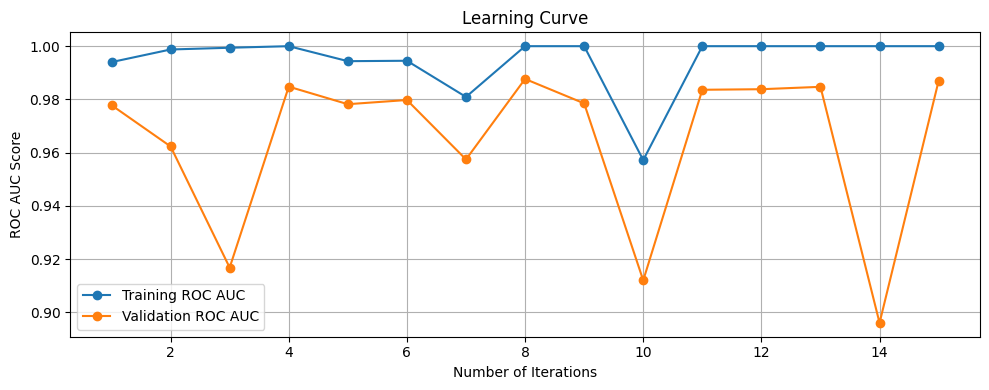

In [244]:
# Plot of the Learning Rate Distribution Curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Creating a list for storing all train ROC Scores
train_scores = []
#Creating a list for storing all Validation ROC Scores
val_scores = []
#Creating a list for storing all Validation ROC Scores for Bayesian optimization for further comparison w.r.t hyperopt optimization
roc_score_BO = []
for para in list_of_all_params:
    # Initialize classifier with current n_estimators
    classifier = RandomForestClassifier(criterion =para[2], max_depth = int(para[0]), n_estimators = int(para[1]),
                                             max_features = float(para[3]), n_jobs=-1, random_state=42)

    # Train the classifier
    classifier.fit(x_train, y_train)

    # Predict probabilities for ROC AUC calculation
    y_train_score = classifier.predict_proba(x_train)
    y_val_score = classifier.predict_proba(x_test)

    # Compute ROC AUC scores
    train_roc_auc = roc_auc_score(y_train, y_train_score, multi_class='ovr')
    val_roc_auc = roc_auc_score(y_test, y_val_score, multi_class='ovr')

    # Store scores
    train_scores.append(train_roc_auc)
    val_scores.append(val_roc_auc)
    roc_score_BO.append(val_roc_auc)


# Plotting the learning curves
plt.figure(figsize=(10, 4))
plt.plot(scaling_x, train_scores, marker='o', label='Training ROC AUC')
plt.plot(scaling_x, val_scores, marker='o', label='Validation ROC AUC')
plt.xlabel('Number of Iterations')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# TPE (Tree-Parzen Estimator)

In [245]:
from sklearn.model_selection import StratifiedKFold

In [246]:
# Define the model and objective function
def create_model(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    return model

def objective_function(params):
    model = create_model(params['n_estimators'],
                         params['max_depth'],
                         params['min_samples_split'])
    
    # Cross-validation with StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='roc_auc')
    mean_roc_auc = np.mean(roc_auc_scores)
    
    return -mean_roc_auc  # Minimize negative ROC AUC (TPE maximizes)

In [247]:
def tpe_optimization(objective_function, space, n_calls):
    # Initialize lists to store hyperparameters and objective function values
    params = []
    results = []
    
    for _ in range(n_calls):
        # Sample hyperparameters from the search space
        next_params = {key: np.random.choice(values) for key, values in space.items()}
        
        # Evaluate objective function
        score = objective_function(next_params)
        
        # Store results
        params.append(next_params)
        results.append(score)
        
        # Update probability distributions based on observed results
        # For simplicity, we do not implement this complex part here
        
    # Get index of best result
    best_index = np.argmax(results)
    best_params = params[best_index]
    
    return best_params

# Define the search space
space = {
    'n_estimators': [10, 100, 500, 1000],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 50]
}

# Perform optimization using TPE
best_hyperparams = tpe_optimization(objective_function, space, n_calls=20)

print("Best hyperparameters:", best_hyperparams)

Best hyperparameters: {'n_estimators': 10, 'max_depth': 2, 'min_samples_split': 2}


In [248]:
best_params

[14, 478, 'entropy', 0.7402652389163321]

In [249]:
# # Train the model with the best hyperparameters
# best_clf1 = RandomForestClassifier(**best_params)
# cross_val_scores = cross_val_score(best_clf1, x_train, y_train, scoring='accuracy', cv=5)

In [250]:
# Example data (replace with your actual data)
best_clf1.fit(x_train, y_train)
 
y_score =  best_clf1.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

ROC AUC (One-vs-Rest): 0.9879483948936622


In [251]:

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.934375 0.928125 0.884375 0.884375 0.928125]
Mean cross-validation score: 0.9118749999999999


# hyperopt

In [252]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

In [253]:
# Optimization Function for obtaining best hyperparameter values.
def optimize(params, x, y, list_of_all_params_hyperopt):
    #storing the list of set of hyperparameters values in each iteration
    list_of_all_params_hyperopt.append(list(params.values()))
    model = ensemble.RandomForestClassifier(**params,n_jobs=-1, random_state=42)
    kf = model_selection.KFold(n_splits=5)
    accuracies = []
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]

        xtest = x[test_idx]
        ytest = y[test_idx]

        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        fold_acc = metrics.accuracy_score(ytest, preds)
        accuracies.append(fold_acc)

    return -1.0 * np.mean(accuracies)

In [254]:
#Defining the range of hyperparameters values
param_space = {
    "max_depth": scope.int(hp.quniform("max_depth", 3, 15, 1)),
    "n_estimators": scope.int(hp.quniform("n_estimators", 100, 600, 1)),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "max_features": hp.uniform("max_features", 0.01, 1)
}
# Creating a list to store all set/list of hyperparameters values
list_of_all_params_hyperopt=[]
optimization_function = partial(
    optimize,
    x=X,
    y=y,
    list_of_all_params_hyperopt=list_of_all_params_hyperopt
)

trials = Trials() # It would be nice to see exactly what is happening inside the hyperopt black box. The Trials object allows us to do just that.

result = fmin(
    fn=optimization_function,
    space=param_space,
    algo=tpe.suggest,
    max_evals=15,
    trials=trials,
)

print(result)

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 15/15 [01:18<00:00,  5.26s/trial, best loss: -0.9039999999999999]
{'criterion': 1, 'max_depth': 13.0, 'max_features': 0.40168311199607204, 'n_estimators': 524.0}


In [255]:
print(list_of_all_params_hyperopt)

[['gini', 10, 0.26830051770697777, 353], ['entropy', 5, 0.31836127506769657, 379], ['gini', 10, 0.8093704395768877, 468], ['gini', 7, 0.20567814971704124, 269], ['gini', 8, 0.9965777558671094, 137], ['gini', 8, 0.265591072791133, 175], ['gini', 10, 0.5097766608359211, 368], ['entropy', 13, 0.40168311199607204, 524], ['gini', 13, 0.6682769907175214, 451], ['entropy', 6, 0.7541975129197453, 533], ['gini', 8, 0.7765778188623954, 367], ['gini', 11, 0.9622052882123976, 449], ['entropy', 11, 0.2105889972873135, 518], ['gini', 6, 0.47369383943501964, 272], ['entropy', 12, 0.24206789657900898, 531]]


In [256]:
# Print the optimized  hyperparameters
print("optimized  hyperparameters:", result)

optimized  hyperparameters: {'criterion': 1, 'max_depth': 13.0, 'max_features': 0.40168311199607204, 'n_estimators': 524.0}


In [257]:
# Train the model with the result/optimized  hyperparameters
best_params = {
    'max_depth': int(result['max_depth']),
    'n_estimators': int(result['n_estimators']),
    'criterion': ['gini', 'entropy'][result['criterion']],
    'max_features': result['max_features']
}


In [258]:
# Train the model with the best hyperparameters
best_clf = RandomForestClassifier(**best_params, n_jobs=-1, random_state=42)
cross_val_scores = cross_val_score(best_clf, X, y, scoring='accuracy', cv=5)

In [259]:
# Evaluation of the ROC-AUC score for the optimized hyperparameters
best_clf.fit(x_train, y_train)

y_score =  best_clf.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

ROC AUC (One-vs-Rest): 0.9873727291245116


In [260]:

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.9075 0.9225 0.9125 0.89   0.8975]
Mean cross-validation score: 0.906


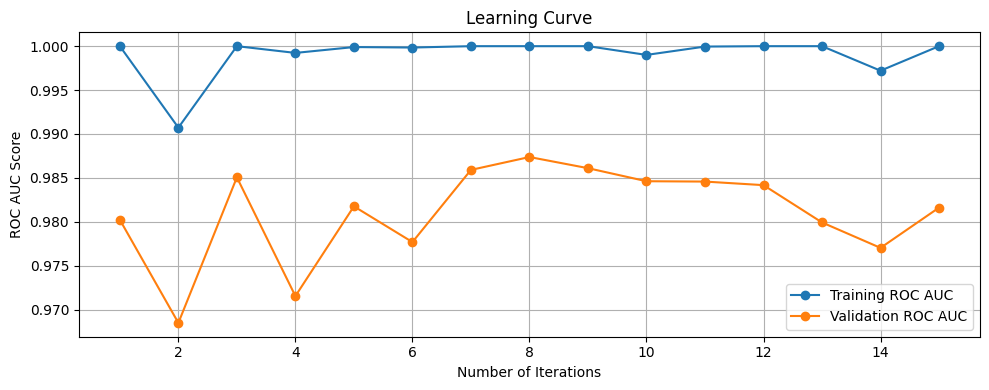

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_scores = []
val_scores = []
roc_score_hyperopt = []
for para in list_of_all_params_hyperopt:
    # Initialize classifier with current n_estimators
    classifier = RandomForestClassifier(criterion =para[0], max_depth = int(para[1]), n_estimators = int(para[3]),
                                             max_features = float(para[2]), n_jobs=-1, random_state=42)

    # Train the classifier
    classifier.fit(x_train, y_train)

    # Predict probabilities for ROC AUC calculation
    y_train_score = classifier.predict_proba(x_train)
    y_val_score = classifier.predict_proba(x_test)

    # Compute ROC AUC scores
    train_roc_auc = roc_auc_score(y_train, y_train_score, multi_class='ovr')
    val_roc_auc = roc_auc_score(y_test, y_val_score, multi_class='ovr')

    # Store scores
    train_scores.append(train_roc_auc)
    val_scores.append(val_roc_auc)
    roc_score_hyperopt.append(val_roc_auc)
# Plotting the learning curves
plt.figure(figsize=(10, 4))
plt.plot(scaling_x, train_scores, marker='o', label='Training ROC AUC')
plt.plot(scaling_x, val_scores, marker='o', label='Validation ROC AUC')
plt.xlabel('Number of Iterations')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Learning Rate Distribution Curve Comparison Of Bayesian optimisation & Hyperopt

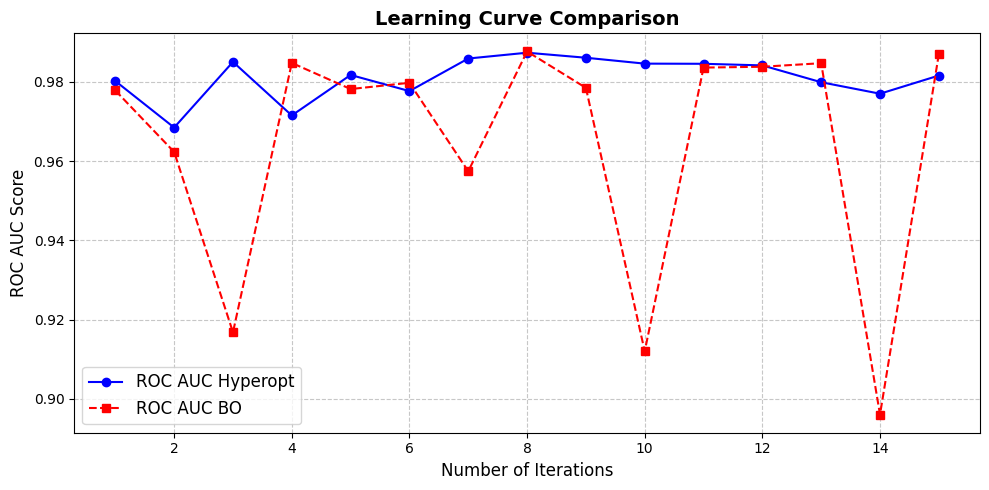

In [262]:
import matplotlib.pyplot as plt

# Assuming scaling_x, roc_score_hyperopt, and roc_score_BO are defined elsewhere

plt.figure(figsize=(10, 5))  # Increase height to 6 inches

# Plot with different line styles and colors
plt.plot(scaling_x, roc_score_hyperopt, marker='o', linestyle='-', color='b', label='ROC AUC Hyperopt')
plt.plot(scaling_x, roc_score_BO, marker='s', linestyle='--', color='r', label='ROC AUC BO')

plt.xlabel('Number of Iterations', fontsize=12)  # Increase font size
plt.ylabel('ROC AUC Score', fontsize=12)  # Increase font size
plt.title('Learning Curve Comparison', fontsize=14, fontweight='bold')  # Increase font size and add bold

plt.legend(fontsize=12)  # Increase legend font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with dashed lines and reduce opacity

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
